In [85]:
# Dependencies

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint

In [86]:
land_use_dataframe = pd.read_csv('data/land_use.csv')
land_use_dataframe = land_use_dataframe[['Area', 'Item', 'Year', 'Unit', 'Value']]
land_use_dataframe

,Area,Item,Year,Unit,Value
0,Argentina,Country area,1961,1000 ha,278040.0
1,Argentina,Country area,1962,1000 ha,278040.0
2,Argentina,Country area,1963,1000 ha,278040.0
3,Argentina,Country area,1964,1000 ha,278040.0
4,Argentina,Country area,1965,1000 ha,278040.0
...,...,...,...,...,...
23426,Australia and New Zealand,Primary Forest,2013,1000 ha,7192.6
23427,Australia and New Zealand,Primary Forest,2014,1000 ha,7195.8
23428,Australia and New Zealand,Primary Forest,2015,1000 ha,7199.0
23429,Australia and New Zealand,Primary Forest,2016,1000 ha,7199.0


In [87]:
land_use_dataframe['Item'].value_counts()

Country area                                            1711
Agricultural land                                       1711
Land area                                               1711
Land under perm. meadows and pastures                   1711
Agriculture                                             1711
Forest land                                             1710
Cropland                                                1593
Inland waters                                           1593
Arable land                                             1593
Land area equipped for irrigation                       1584
Land under permanent crops                              1579
Planted Forest                                           870
Naturally regenerating forest                            870
Other land                                               860
Primary Forest                                           812
Agriculture area under organic agric.                    393
Agriculture area certifi

In [88]:
land_use_dataframe = land_use_dataframe.replace(
     {"Agriculture area under organic agric.": "Agriculture", "Agriculture area certified organic": "Agriculture", "Agriculture area actually irrigated":"Agriculture", "Inland waters used for aquac. or holding facilities":"Inland waters","Forestry area actually irrigated":"Forest land","Land under permanent crops":"Cropland", "Cropland area actually irrigated":"Cropland", "Cropland area under organic agric.":"Cropland", "Cropland area under conservation tillage": "Cropland", "Cropland area certified organic": "Cropland", "Cropland area under conventional tillage": "Cropland", "Cropland area under zero or no tillage":"Cropland", "Agriculture":"Agricultural land", "Land under temporary crops":"Cropland", "Primary Forest":"Forest land", "Perm. meadows & pastures - Nat. growing":"Meadows & Pastures", "Perm. meadows & pastures - Cultivated":"Meadows & Pastures", "Land with temporary fallow":"Cropland", "Land under protective cover":"Other land", "Land used for aquaculture":"Other land", "Coastal waters used for aquac. or holding facilities":"Other land", "Naturally regenerating forest":"Forest land", "Perm. meadows & pastures area actually irrig.":"Meadows & Pastures", "Perm. meadows & pastures area certified organic":"Meadows & Pastures", "Perm. meadows & pastures area under organic agric.":"Meadows & Pastures", "Land under perm. meadows and pastures":"Meadows & Pastures", "Land area actually irrigated":"Other land", "Land under temp. meadows and pastures":"Meadows & Pastures"})
land_use_dataframe['Item'].value_counts()

Cropland                             3720
Agricultural land                    3422
Forest land                          3393
Meadows & Pastures                   2145
Country area                         1711
Land area                            1711
Inland waters                        1594
Arable land                          1593
Land area equipped for irrigation    1584
Other land                            918
Planted Forest                        870
Agriculture                           770
Name: Item, dtype: int64

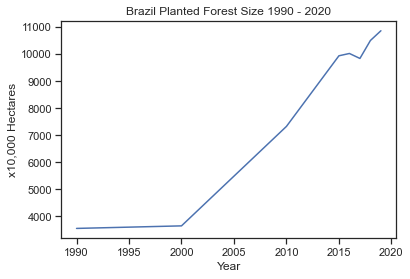

In [89]:
land_use_dataframe = land_use_dataframe.replace({"Land area equipped for irrigation":"Other land"})
land_use_dataframe

brazil = land_use_dataframe[land_use_dataframe['Area'] == 'Brazil']
brazil = brazil[['Item', 'Year', 'Value']]

forest_land = brazil[brazil['Item'] == 'Forest land']
forest = forest_land.groupby('Year').mean()

crops = brazil[brazil['Item'] == 'Cropland']
crops = crops.groupby('Year').mean()

ag = brazil[brazil['Item'] == 'Agricultural land']
ag = ag.groupby('Year').mean()

arable = brazil[brazil['Item'] == 'Arable land']
arable = arable.groupby('Year').mean()

planted = brazil[brazil['Item'] == 'Planted Forest']
planted = planted.groupby('Year').mean()

plt.plot(planted)
plt.title("Brazil Planted Forest Size 1990 - 2020")
plt.xlabel("Year")
plt.ylabel("x10,000 Hectares")
plt.savefig("Images/Brazil Planted Forest HA.png")

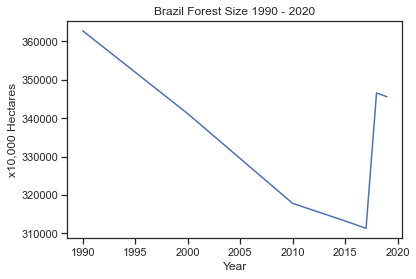

In [90]:
plt.plot(forest)
plt.title("Brazil Forest Size 1990 - 2020")
plt.xlabel("Year")
plt.ylabel("x10,000 Hectares")
plt.savefig("Images/Brazil Forest Size.png")

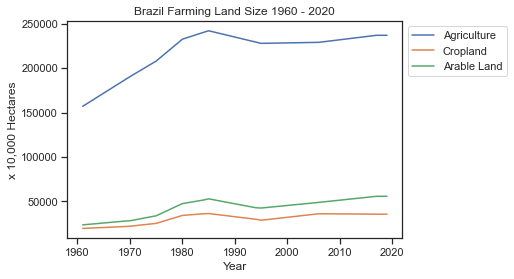

In [92]:
plt.plot(ag)
plt.plot(crops)
plt.plot(arable)

labels = ["Agriculture", "Cropland", "Arable Land"]

plt.title("Brazil Farming Land Size 1960 - 2020")
plt.xlabel("Year")
plt.ylabel("x 10,000 Hectares")
plt.legend(labels, bbox_to_anchor=(1.0, 1), loc='best')
plt.savefig("Images/Brazil Farming land.png")

In [93]:
brazil_loss = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/brazil_loss.csv')
brazil_loss = brazil_loss.drop(columns=['code'])
brazil_loss 

,entity,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
0,Brazil,2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
1,Brazil,2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2,Brazil,2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
3,Brazil,2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
4,Brazil,2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000
5,Brazil,2006,188000,17000,26000,1861000,52000,79000,0,9000,17000,26000,306000
6,Brazil,2007,79000,9000,22000,1577000,96000,446000,9000,13000,13000,39000,310000
7,Brazil,2008,52000,0,17000,1345000,61000,70000,9000,17000,48000,17000,397000
8,Brazil,2009,57000,9000,31000,847000,87000,44000,0,9000,9000,35000,301000
9,Brazil,2010,100000,0,44000,616000,114000,537000,4000,9000,22000,9000,271000


In [94]:
commercial_crops = brazil_loss[['commercial_crops']]
commercial_crops

flooding_due_to_dams = brazil_loss[['flooding_due_to_dams']]

natural_disturbances = brazil_loss[['natural_disturbances']]

pasture = brazil_loss[['pasture']]

selective_logging = brazil_loss[['selective_logging']]



In [96]:
brazil_loss = brazil_loss.set_index(['year'])
brazil_loss = brazil_loss.drop(columns=['entity'])


In [97]:
brazil_graph = brazil_loss[['commercial_crops', 'pasture', 'fire', 'small_scale_clearing', 'selective_logging']]

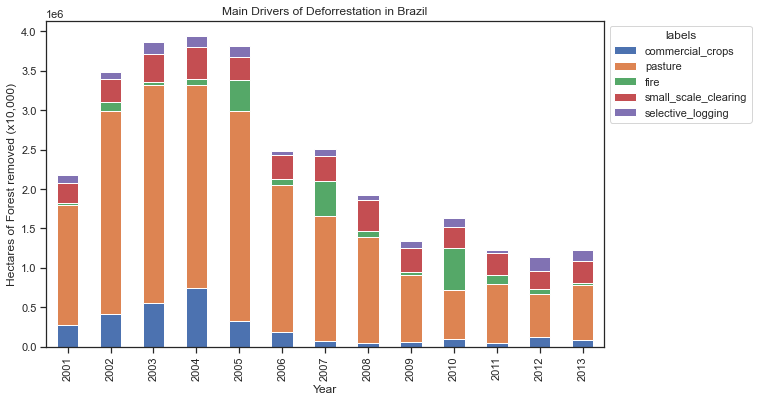

In [98]:
ax = brazil_graph.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('')
plt.title('Main Drivers of Deforrestation in Brazil')
plt.ylabel('Hectares of Forest removed (x10,000)')
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xlabel("Year")
plt.savefig("Images/Drivers of Deforestation Brazil.png")



In [99]:
soybeans = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/soybean_use.csv')
soybeans_br = soybeans[soybeans['entity'] == 'Brazil']
soybeans_br.drop(columns=['code'])

human_food = soybeans_br[['year', 'human_food']]
animal_feed = soybeans_br[['year', 'animal_feed']]
processed = soybeans_br[['year', 'processed']]


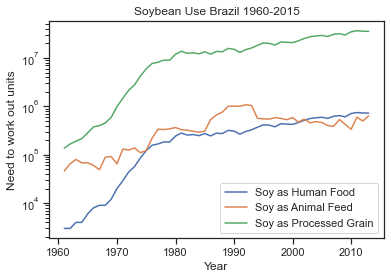

In [102]:
plt.plot(human_food['year'], human_food['human_food'])
plt.plot(animal_feed['year'], animal_feed['animal_feed'])
plt.plot(processed['year'], processed['processed'])

labels = ['Soy as Human Food', 'Soy as Animal Feed', 'Soy as Processed Grain']

plt.title("Soybean Use Brazil 1960-2015")
plt.legend(labels, loc='lower right')
plt.xlabel("Year")
plt.ylabel("Need to work out units")
plt.yscale('log')
plt.savefig("Images/Brazil Soybean Use.png")